<a href="https://colab.research.google.com/github/Prabhu-Tejas/ML_projects/blob/main/Haberman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title: Haberman’s Survival Data**


Understanding the dataset

Description: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.



Attribute Information:
Age of patient at the time of operation (numerical)
Patient’s year of operation (year — 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) :
1 = the patient survived 5 years or longer
2 = the patient died within 5 years

*Importing libraries, loading the file and understandig the Data*

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
haber = pd.read_csv("https://raw.githubusercontent.com/Prabhu-Tejas/LU_Project/main/haberman.csv")

In [5]:
haber.head()

,Age,Opt. year,Axial node,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
haber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   Opt. year        306 non-null    int64
 2   Axial node       306 non-null    int64
 3   Survival status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


Observations:
There are no missing values in this data set.
All the columns are of the integer data type.
The datatype of the urvival status is an integer, it has to be converted to a categorical datatype
In the survival status column, the value 1 can be mapped to ‘yes’ which means the patient has survived 5 years or longer. And the value 2 can be mapped to ‘no’ which means the patient died within 5 years

In [9]:
haber.describe()

,Age,Opt. year,Axial node,Survival status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [11]:
haber["Survival status"].value_counts()

1    225
2     81
Name: Survival status, dtype: int64

Here, it tells how many patients survived and how many did not survive.
Out of 306 patients, 225 patients survived and 81 did not.
The dataset is imbalanced.

The objective of classifying the survival status of a new patient based on the given features can be a difficult task as the data is imbalanced.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


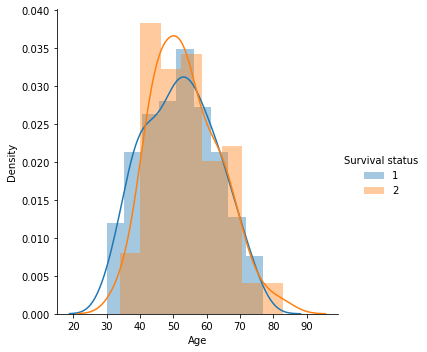

In [14]:
sns.FacetGrid(haber,hue="Survival status",height = 5).map(sns.distplot,"Age").add_legend()
plt.show()

Observations:

From the above graph, we cannot decide the survival chances of a patient just by considering the age parameter  which tells us that survival chances are irrespective of a person’s age.
Although there is major overlapping we can approximately tell that people whose age is in betwen 30–40 are more likely to survive, and 40–60 are less likely to survive. 
But, this cannot be our final conclusion. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


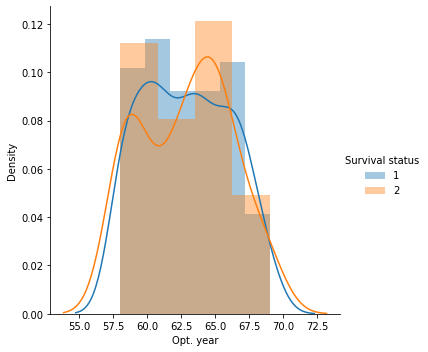

In [19]:
sns.FacetGrid(haber,hue='Survival status',height = 5).map(sns.distplot, "Opt. year").add_legend()
plt.show()

Oservation:

This graph tells how many of the operations were successful and how many weren’t based on the particular operating year. This cannot be a parameter to decide the patient’s survival chances as there is huge overlap.
However, it can be observed that in the years 1960 and 1965 there were more unsuccessful operations.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


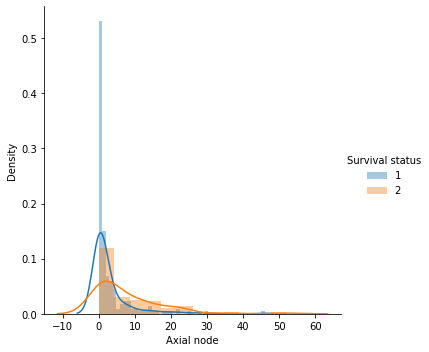

In [22]:
sns.FacetGrid(haber,hue="Survival status",height = 5).map(sns.distplot,"Axial node").add_legend()
plt.show()

Observations:
Patients with no Axial node or 1 node are more likely to survive. 
There are very few chances of surviving if there are 25 or more nodes.

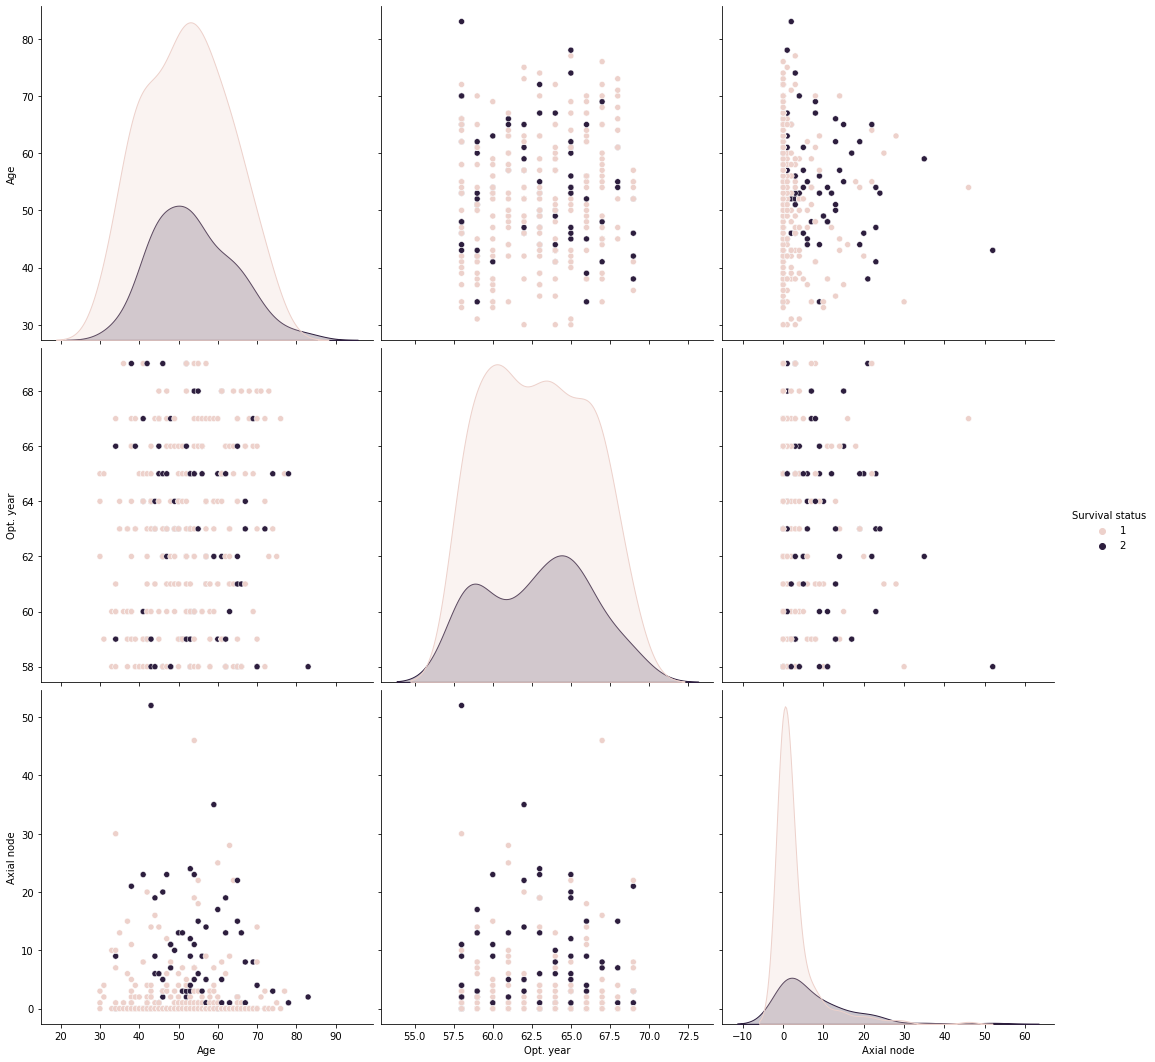

In [23]:
sns.pairplot(haber, hue="Survival status", height = 5)
plt.show()

Conclusions:
Patient’s age and operation year alone are not deciding factors for his/her survival. But, it can be observed people less than 35 years of age have more chance of survival.
Survival chance is inversely proportional to the number of positive axillary nodes. It is observed that the absence of positive axillary nodes cannot always guarantee survival.
